In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
tickers = ['GOOG', 'TSLA', 'META', 'NVDA', 'AAPL', 'EBAY', 'AMZN', 'NFLX', 'MSFT', 'INTC']
start_date = '2023-07-27'
end_date = '2024-07-27'
date_range = pd.date_range(start=start_date, end=end_date)

stock_data = {}
macd_data = {}
stochastic_data = {}
next_day = {}

for stock in tickers:
    stock_data[stock] = yf.download(stock, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data['TSLA']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000
2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000
2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900
...,...,...,...,...,...,...
2024-07-22,244.210007,253.210007,243.750000,251.509995,251.509995,101225400
2024-07-23,253.600006,255.759995,245.630005,246.380005,246.380005,111928200
2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900


In [4]:
ema_12 = {}
ema_26 = {}
ema_9 = {}

fast_d = {}
slow_k = {}
slow_d = {}

for stock in tickers:
  ema_12[stock] = stock_data[stock]['Adj Close'].ewm(span = 12).mean()
  ema_26[stock] = stock_data[stock]['Adj Close'].ewm(span = 26).mean()
  macd_data[stock] = ema_12[stock] - ema_26[stock]

  low_value = (stock_data[stock]['Adj Close']).min()
  high_value = stock_data[stock]['Adj Close'].max()
  stochastic_data[stock] = ((stock_data[stock]['Adj Close'] - low_value) / (high_value-low_value)) * 100 #stochastic line    
  fast_d[stock] = stochastic_data[stock].rolling(3).mean()
  slow_k[stock] = fast_d[stock]
  slow_d[stock] = slow_k[stock].rolling(3).mean()

  next_day[stock] = stock_data[stock]['Adj Close'].shift(-1) - stock_data[stock]['Adj Close']

GOOG


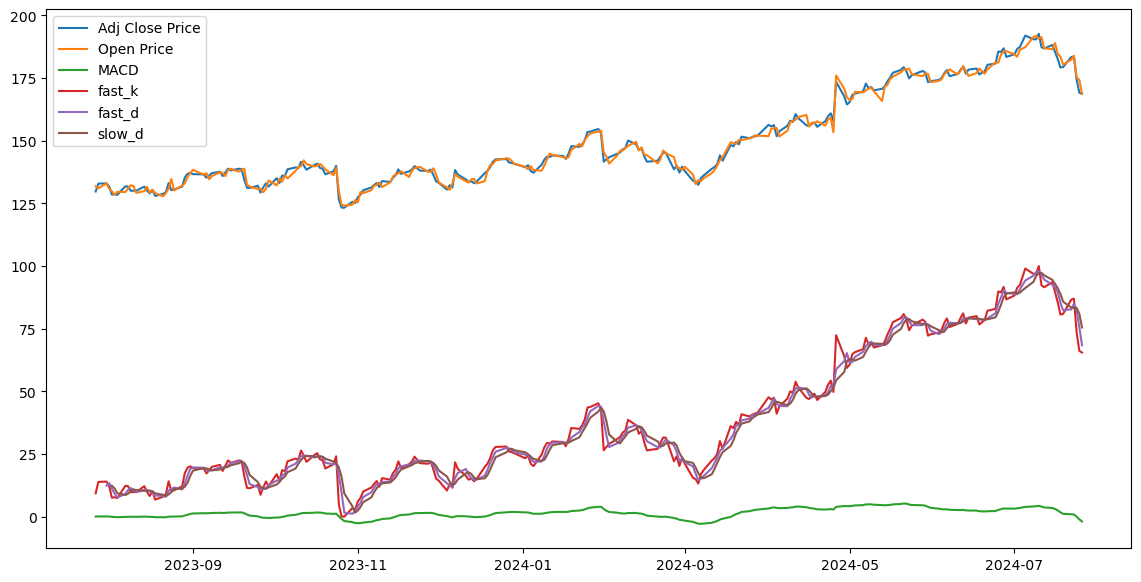

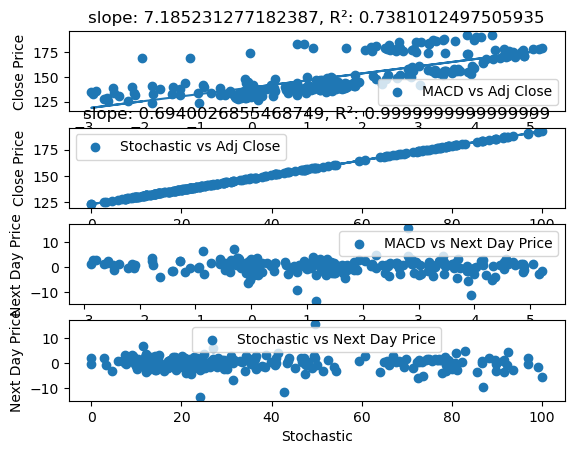

TSLA


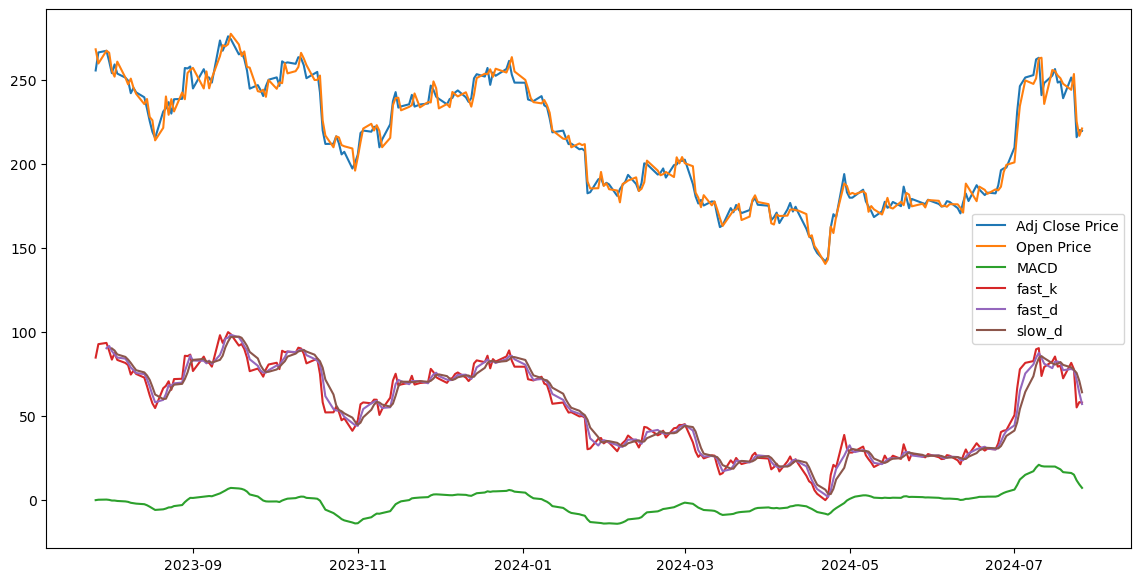

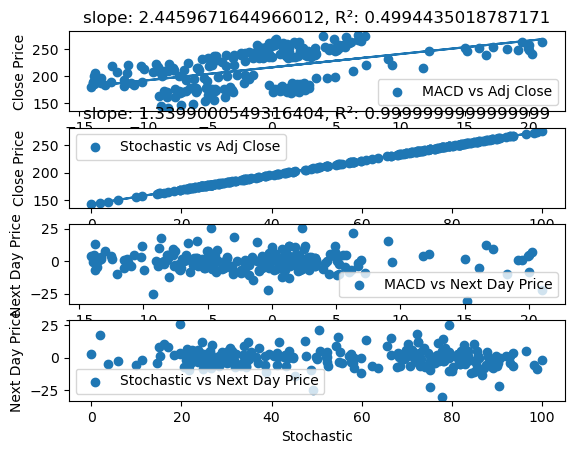

META


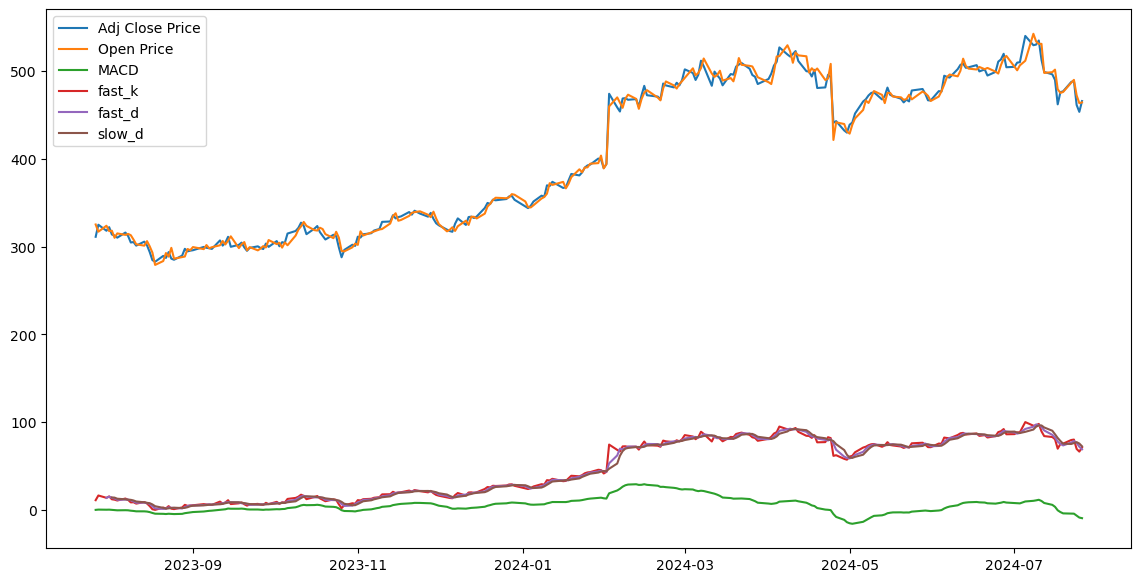

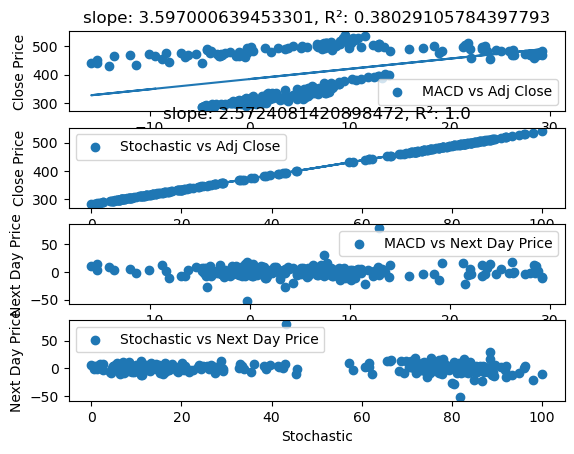

NVDA


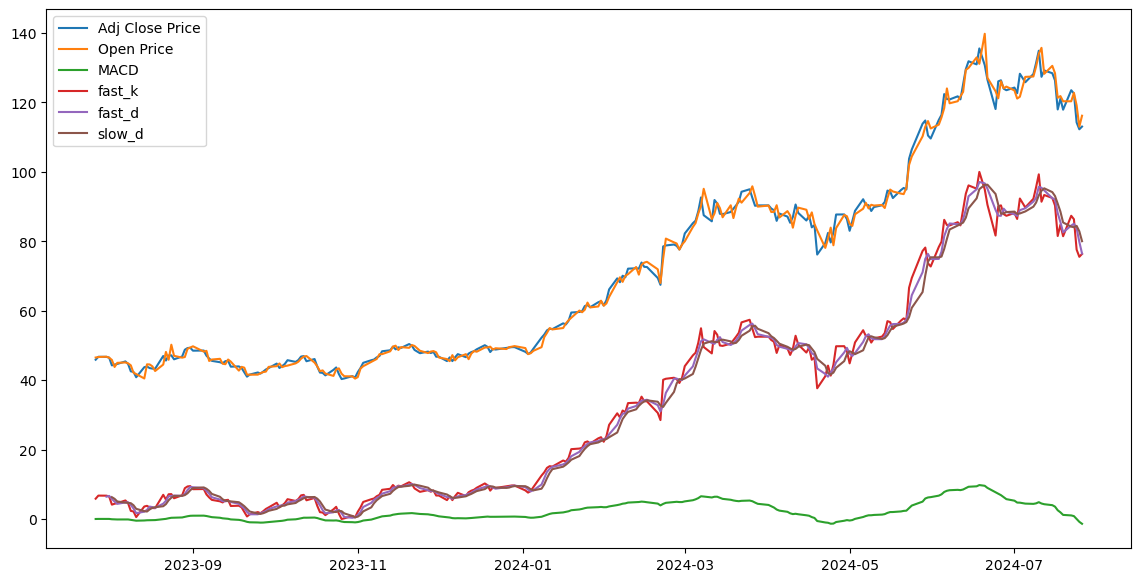

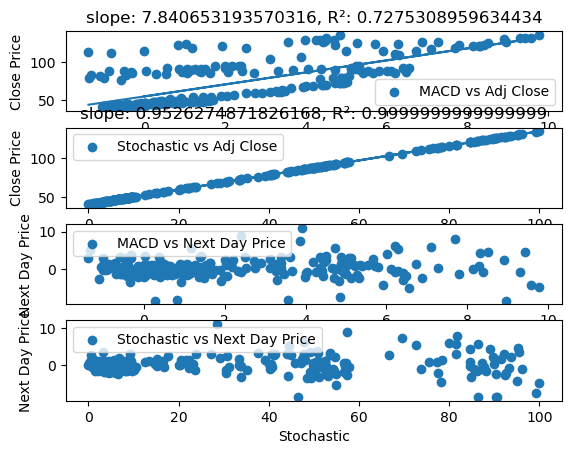

AAPL


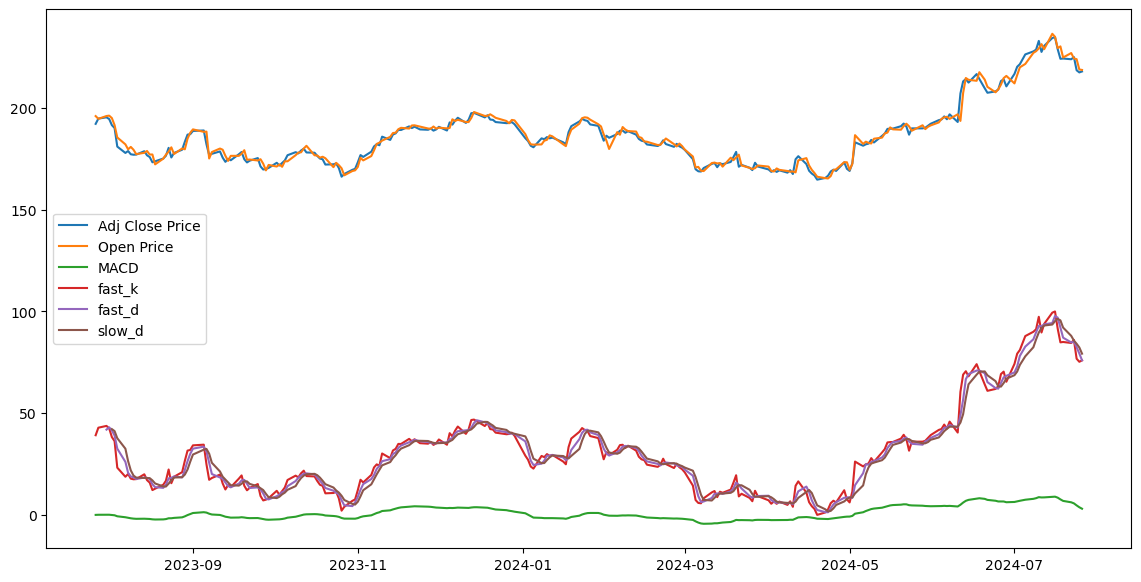

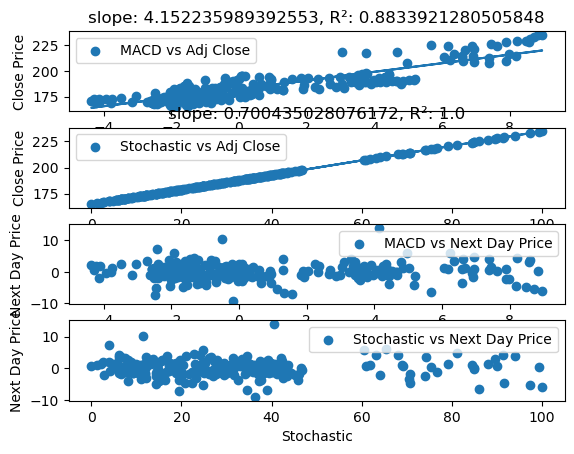

EBAY


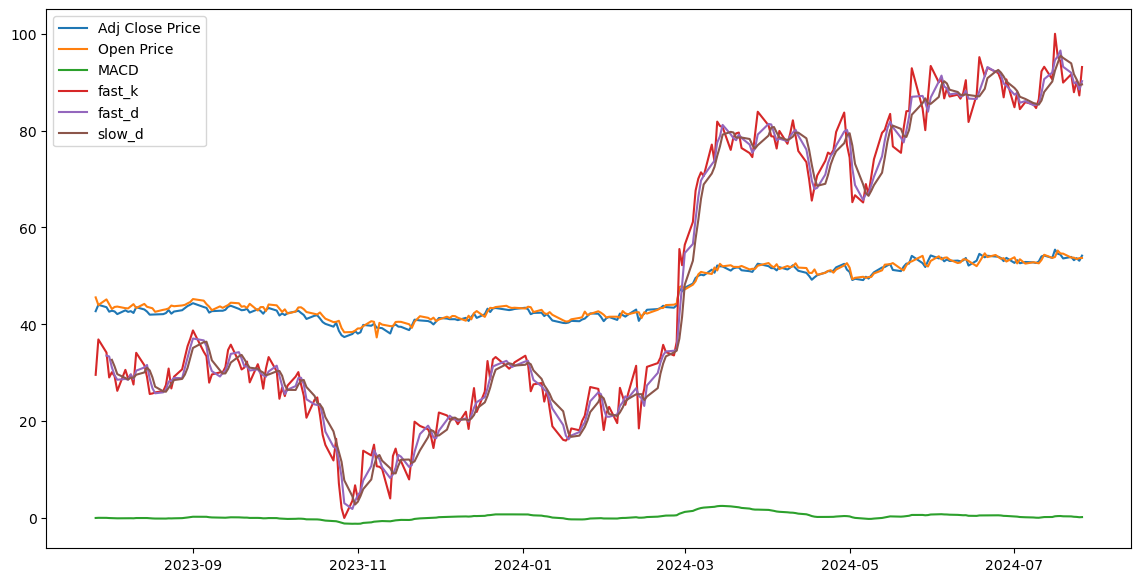

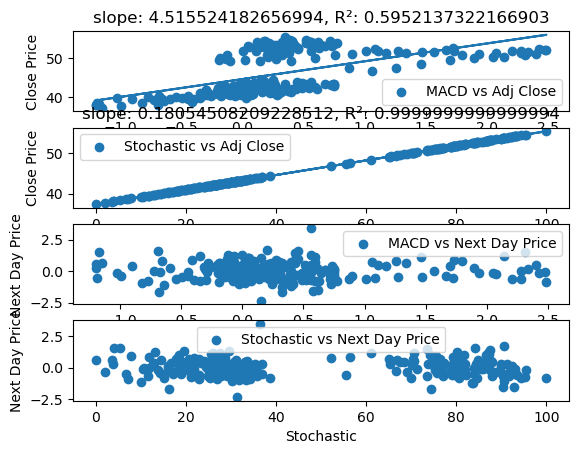

AMZN


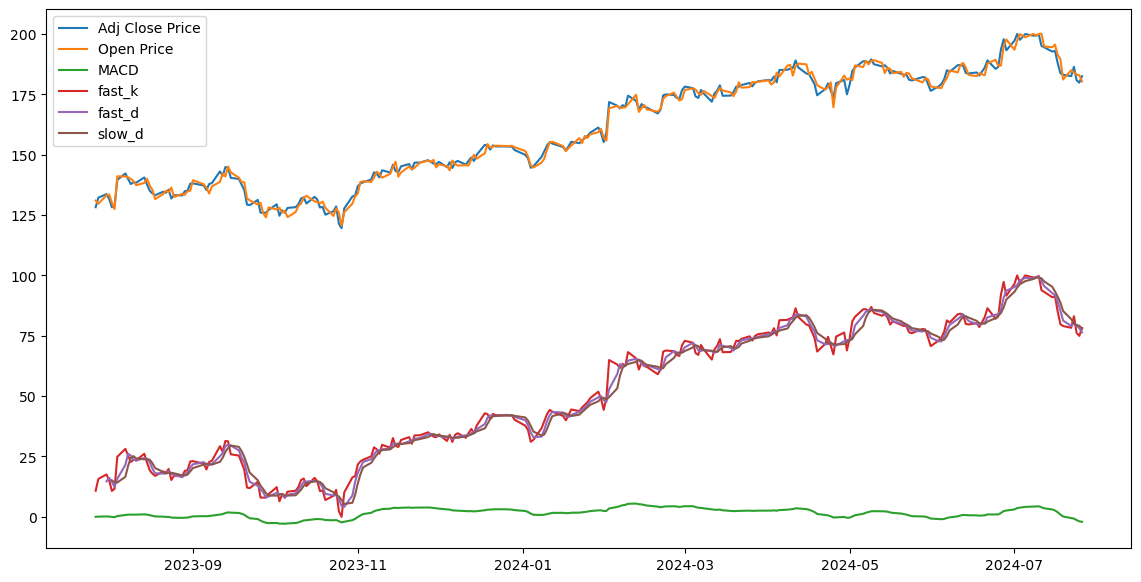

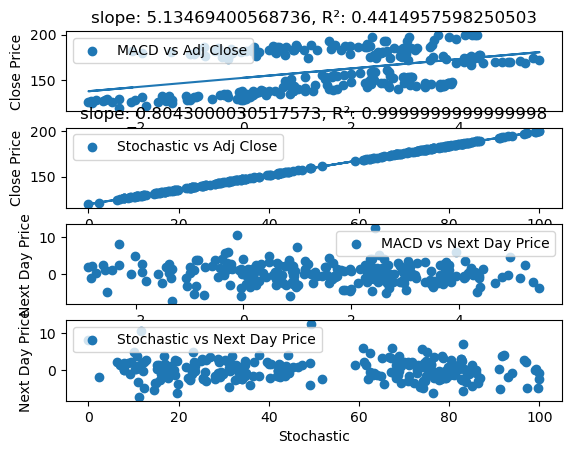

NFLX


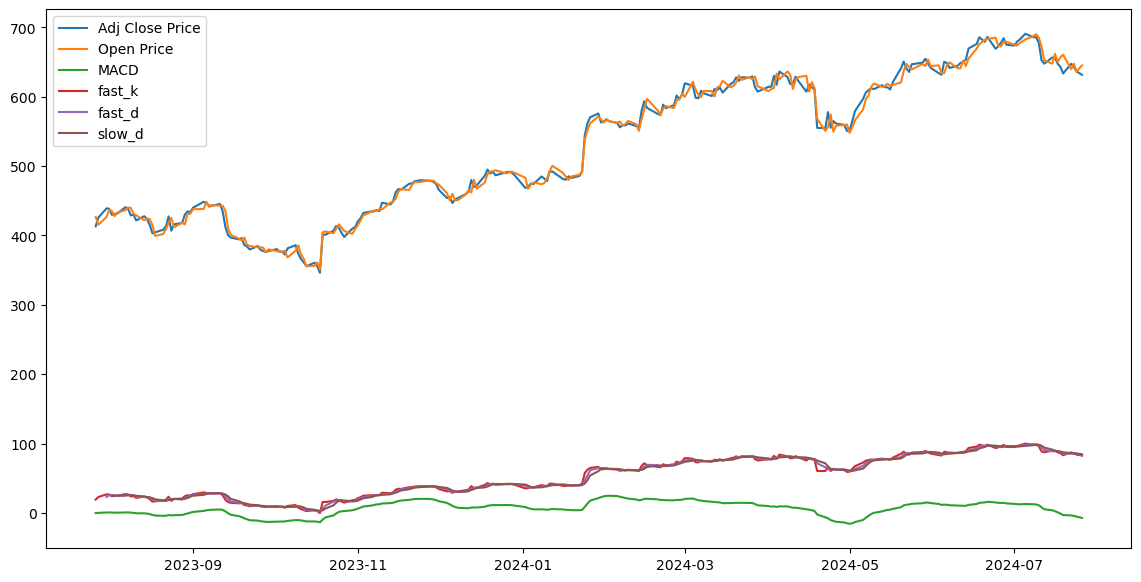

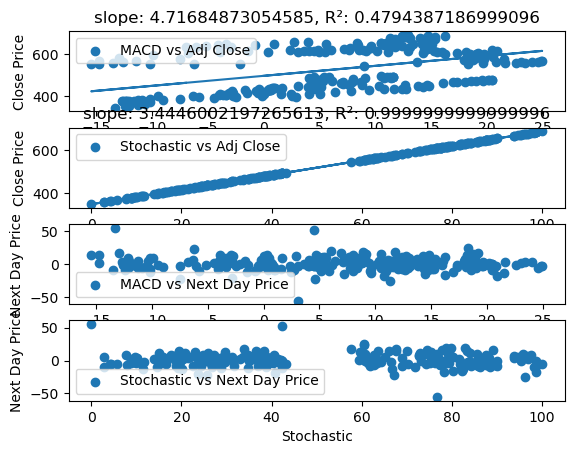

MSFT


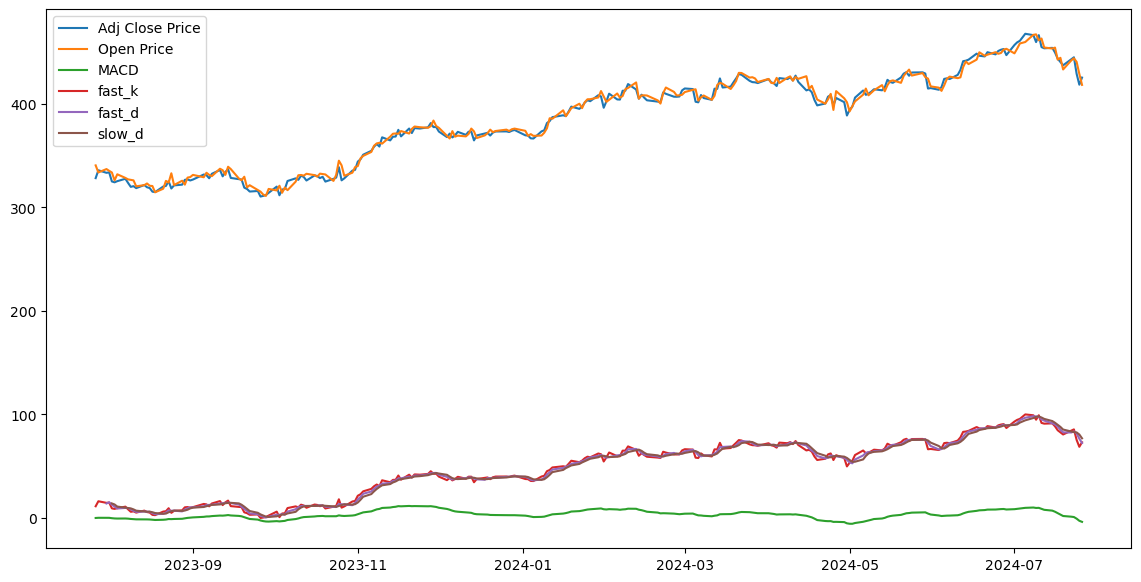

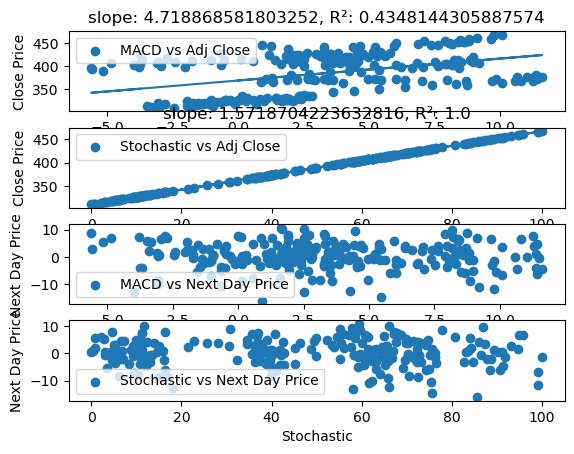

INTC


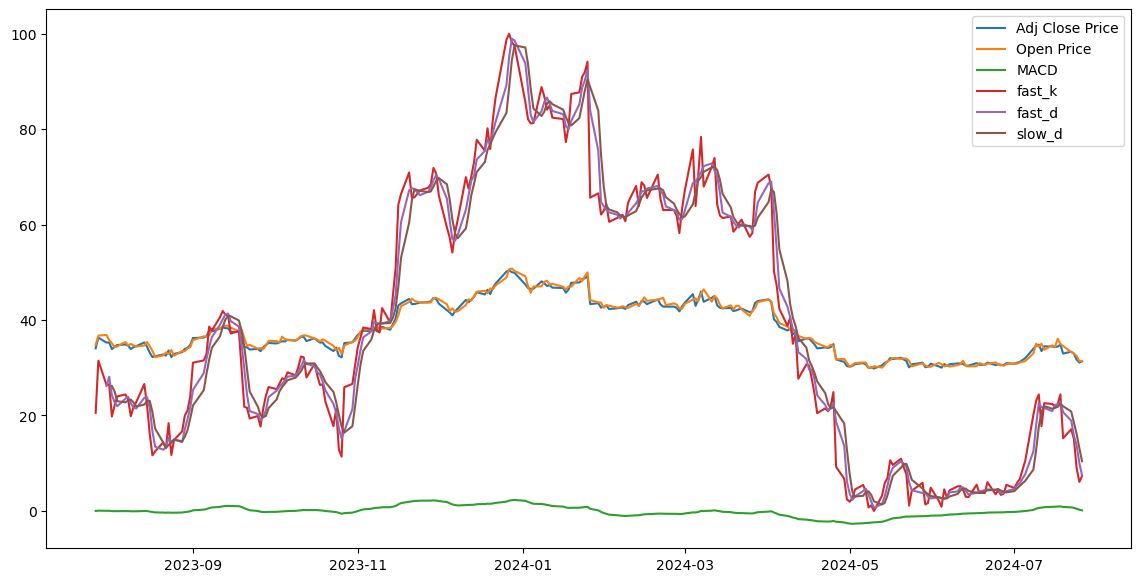

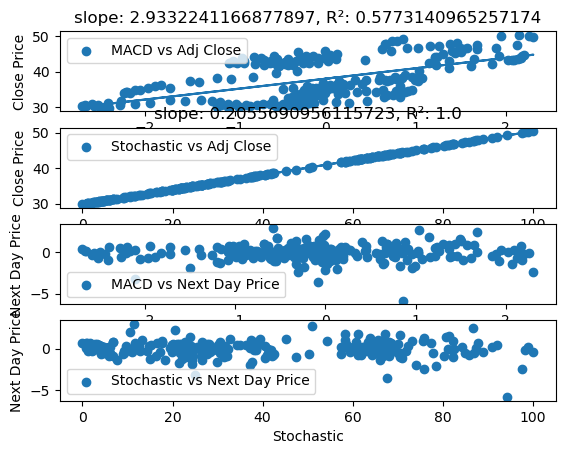

In [5]:
for stock in tickers:
    print(stock)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data[stock]['Adj Close'], label='Adj Close Price')
    plt.plot(stock_data[stock]['Open'], label='Open Price')
    plt.plot(macd_data[stock], label = 'MACD')
    plt.plot(stochastic_data[stock], label = 'fast_k')
    plt.plot(fast_d[stock], label = 'fast_d')
    plt.plot(slow_d[stock], label = 'slow_d')
    plt.legend()
    plt.show()

    plt.subplot(4, 1, 1)
    x = macd_data[stock]
    y = stock_data[stock]['Adj Close']
    plt.scatter(x, y, label='MACD vs Adj Close')
    plt.xlabel('MACD')
    plt.ylabel('Close Price')
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x,y)
    x = np.array(x)
    y = np.array(y)
    plt.plot(x,x*slope+intercept)
    plt.title("slope: {}, R²: {}".format(slope,rvalue))
    plt.legend()

    plt.subplot(4, 1, 2)
    x = stochastic_data[stock]
    y = stock_data[stock]['Adj Close']
    plt.scatter(x, y, label='Stochastic vs Adj Close')
    plt.xlabel('Stochastic')
    plt.ylabel('Close Price')
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x,y)
    x = np.array(x)
    y = np.array(y)
    plt.plot(x,x*slope+intercept)
    plt.title("slope: {}, R²: {}".format(slope,rvalue))
    plt.legend()
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.scatter(macd_data[stock], next_day[stock], label='MACD vs Next Day Price')
    plt.xlabel('MACD')
    plt.ylabel('Next Day Price')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.scatter(stochastic_data[stock], next_day[stock], label='Stochastic vs Next Day Price')
    plt.xlabel('Stochastic')
    plt.ylabel('Next Day Price')
    plt.legend()

    plt.show()
